In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from influxdb import DataFrameClient

In [2]:
plt.rcParams['figure.figsize'] = [20, 15]

In [3]:
host = 'localhost'
port = 8086
user = 'root'
password = 'root'
dbname = 'residential'
client = DataFrameClient(host, port, user, password, dbname)

In [4]:
tmp=client.query('select * from "Mean Operative Temperature"')
print(tmp)
tmp['Mean Operative Temperature']

defaultdict(<class 'list'>, {'Mean Operative Temperature':                               location                        node  \
2005-01-01 00:00:00+00:00  residential  Mean Operative Temperature   
2005-01-01 01:00:00+00:00  residential  Mean Operative Temperature   
2005-01-01 02:00:00+00:00  residential  Mean Operative Temperature   
2005-01-01 03:00:00+00:00  residential  Mean Operative Temperature   
2005-01-01 04:00:00+00:00  residential  Mean Operative Temperature   
...                                ...                         ...   
2005-12-31 19:00:00+00:00  residential  Mean Operative Temperature   
2005-12-31 20:00:00+00:00  residential  Mean Operative Temperature   
2005-12-31 21:00:00+00:00  residential  Mean Operative Temperature   
2005-12-31 22:00:00+00:00  residential  Mean Operative Temperature   
2005-12-31 23:00:00+00:00  residential  Mean Operative Temperature   

                                 value  
2005-01-01 00:00:00+00:00   19.3375424  
2005-01-01 01:00:0

,location,node,value
2005-01-01 00:00:00+00:00,residential,Mean Operative Temperature,19.3375424
2005-01-01 01:00:00+00:00,residential,Mean Operative Temperature,19.31299137
2005-01-01 02:00:00+00:00,residential,Mean Operative Temperature,19.28134457
2005-01-01 03:00:00+00:00,residential,Mean Operative Temperature,19.25197661
2005-01-01 04:00:00+00:00,residential,Mean Operative Temperature,19.22599625
...,...,...,...
2005-12-31 19:00:00+00:00,residential,Mean Operative Temperature,18.36997311
2005-12-31 20:00:00+00:00,residential,Mean Operative Temperature,18.33798615
2005-12-31 21:00:00+00:00,residential,Mean Operative Temperature,18.30583656
2005-12-31 22:00:00+00:00,residential,Mean Operative Temperature,18.27503002


In [5]:
df = tmp['Mean Operative Temperature'].pivot(columns='node',values='value')

In [6]:
df.columns
df

node,Mean Operative Temperature
2005-01-01 00:00:00+00:00,19.3375424
2005-01-01 01:00:00+00:00,19.31299137
2005-01-01 02:00:00+00:00,19.28134457
2005-01-01 03:00:00+00:00,19.25197661
2005-01-01 04:00:00+00:00,19.22599625
...,...
2005-12-31 19:00:00+00:00,18.36997311
2005-12-31 20:00:00+00:00,18.33798615
2005-12-31 21:00:00+00:00,18.30583656
2005-12-31 22:00:00+00:00,18.27503002


In [7]:
tmp=client.query('select * from "Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"')
tmp['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)']

,location,node,value
2005-01-01 00:00:00+00:00,residential,Environment:Site Outdoor Air Drybulb Temperatu...,7.641666667
2005-01-01 01:00:00+00:00,residential,Environment:Site Outdoor Air Drybulb Temperatu...,7.925
2005-01-01 02:00:00+00:00,residential,Environment:Site Outdoor Air Drybulb Temperatu...,7.625
2005-01-01 03:00:00+00:00,residential,Environment:Site Outdoor Air Drybulb Temperatu...,7.383333333
2005-01-01 04:00:00+00:00,residential,Environment:Site Outdoor Air Drybulb Temperatu...,7.241666667
...,...,...,...
2005-12-31 19:00:00+00:00,residential,Environment:Site Outdoor Air Drybulb Temperatu...,1.925
2005-12-31 20:00:00+00:00,residential,Environment:Site Outdoor Air Drybulb Temperatu...,1.625
2005-12-31 21:00:00+00:00,residential,Environment:Site Outdoor Air Drybulb Temperatu...,1.325
2005-12-31 22:00:00+00:00,residential,Environment:Site Outdoor Air Drybulb Temperatu...,1.025


In [8]:
df['Outdoor']=client.query('select * from "Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"')['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)']['value']
df.head()

node,Mean Operative Temperature,Outdoor
2005-01-01 00:00:00+00:00,19.3375424,7.641666667
2005-01-01 01:00:00+00:00,19.31299137,7.925
2005-01-01 02:00:00+00:00,19.28134457,7.625
2005-01-01 03:00:00+00:00,19.25197661,7.383333333
2005-01-01 04:00:00+00:00,19.22599625,7.241666667


In [9]:
tmp=client.query('select * from "DistrictCooling:Facility"')
tmp['DistrictCooling:Facility']

,location,node,value
2005-01-01 00:00:00+00:00,residential,DistrictCooling:Facility [J](Hourly),0.0
2005-01-01 01:00:00+00:00,residential,DistrictCooling:Facility [J](Hourly),0.0
2005-01-01 02:00:00+00:00,residential,DistrictCooling:Facility [J](Hourly),0.0
2005-01-01 03:00:00+00:00,residential,DistrictCooling:Facility [J](Hourly),0.0
2005-01-01 04:00:00+00:00,residential,DistrictCooling:Facility [J](Hourly),0.0
...,...,...,...
2005-12-31 19:00:00+00:00,residential,DistrictCooling:Facility [J](Hourly),0.0
2005-12-31 20:00:00+00:00,residential,DistrictCooling:Facility [J](Hourly),0.0
2005-12-31 21:00:00+00:00,residential,DistrictCooling:Facility [J](Hourly),0.0
2005-12-31 22:00:00+00:00,residential,DistrictCooling:Facility [J](Hourly),0.0


In [10]:
df['Cooling']=client.query('select * from "DistrictCooling:Facility"')['DistrictCooling:Facility']['value']
df.head()

node,Mean Operative Temperature,Outdoor,Cooling
2005-01-01 00:00:00+00:00,19.3375424,7.641666667,0.0
2005-01-01 01:00:00+00:00,19.31299137,7.925,0.0
2005-01-01 02:00:00+00:00,19.28134457,7.625,0.0
2005-01-01 03:00:00+00:00,19.25197661,7.383333333,0.0
2005-01-01 04:00:00+00:00,19.22599625,7.241666667,0.0


In [11]:
tmp=client.query('select * from "DistrictHeating:Facility"')
tmp['DistrictHeating:Facility']

,location,node,value
2005-01-01 00:00:00+00:00,residential,DistrictHeating:Facility [J](Hourly),3997830.768
2005-01-01 01:00:00+00:00,residential,DistrictHeating:Facility [J](Hourly),3986393.165
2005-01-01 02:00:00+00:00,residential,DistrictHeating:Facility [J](Hourly),4134739.816
2005-01-01 03:00:00+00:00,residential,DistrictHeating:Facility [J](Hourly),4257988.512
2005-01-01 04:00:00+00:00,residential,DistrictHeating:Facility [J](Hourly),4345010.573
...,...,...,...
2005-12-31 19:00:00+00:00,residential,DistrictHeating:Facility [J](Hourly),7124240.937
2005-12-31 20:00:00+00:00,residential,DistrictHeating:Facility [J](Hourly),7212374.807
2005-12-31 21:00:00+00:00,residential,DistrictHeating:Facility [J](Hourly),7328416.758
2005-12-31 22:00:00+00:00,residential,DistrictHeating:Facility [J](Hourly),7561861.964


In [12]:
df['Heating']=client.query('select * from "DistrictHeating:Facility"')['DistrictHeating:Facility']['value']
df.head()

node,Mean Operative Temperature,Outdoor,Cooling,Heating
2005-01-01 00:00:00+00:00,19.3375424,7.641666667,0.0,3997830.768
2005-01-01 01:00:00+00:00,19.31299137,7.925,0.0,3986393.165
2005-01-01 02:00:00+00:00,19.28134457,7.625,0.0,4134739.816
2005-01-01 03:00:00+00:00,19.25197661,7.383333333,0.0,4257988.512
2005-01-01 04:00:00+00:00,19.22599625,7.241666667,0.0,4345010.573


In [13]:
tmp=client.query('select * from "Total energy"')
tmp['Total energy']

,location,node,value
2005-01-01 00:00:00+00:00,residential,Total energy[J](Hourly),4055146.883
2005-01-01 01:00:00+00:00,residential,Total energy[J](Hourly),4043709.28
2005-01-01 02:00:00+00:00,residential,Total energy[J](Hourly),4192055.931
2005-01-01 03:00:00+00:00,residential,Total energy[J](Hourly),4315304.627
2005-01-01 04:00:00+00:00,residential,Total energy[J](Hourly),4402326.688
...,...,...,...
2005-12-31 19:00:00+00:00,residential,Total energy[J](Hourly),10861229.26
2005-12-31 20:00:00+00:00,residential,Total energy[J](Hourly),10983313.76
2005-12-31 21:00:00+00:00,residential,Total energy[J](Hourly),11099355.71
2005-12-31 22:00:00+00:00,residential,Total energy[J](Hourly),11298850.28


In [14]:
df['Total']=client.query('select * from "Total energy"')['Total energy']['value']
df.head()

node,Mean Operative Temperature,Outdoor,Cooling,Heating,Total
2005-01-01 00:00:00+00:00,19.3375424,7.641666667,0.0,3997830.768,4055146.883
2005-01-01 01:00:00+00:00,19.31299137,7.925,0.0,3986393.165,4043709.28
2005-01-01 02:00:00+00:00,19.28134457,7.625,0.0,4134739.816,4192055.931
2005-01-01 03:00:00+00:00,19.25197661,7.383333333,0.0,4257988.512,4315304.627
2005-01-01 04:00:00+00:00,19.22599625,7.241666667,0.0,4345010.573,4402326.688


In [15]:
import numpy as np
op_temp =[]
outdoor=[]
for i in range(len(df['Mean Operative Temperature'])):
    op_temp.append(float(df['Mean Operative Temperature'][i]))
    outdoor.append(float(df['Outdoor'][i]))
df['deltaT']=np.array(op_temp)-np.array(outdoor)
df.head()

node,Mean Operative Temperature,Outdoor,Cooling,Heating,Total,deltaT
2005-01-01 00:00:00+00:00,19.3375424,7.641666667,0.0,3997830.768,4055146.883,11.695876
2005-01-01 01:00:00+00:00,19.31299137,7.925,0.0,3986393.165,4043709.28,11.387991
2005-01-01 02:00:00+00:00,19.28134457,7.625,0.0,4134739.816,4192055.931,11.656345
2005-01-01 03:00:00+00:00,19.25197661,7.383333333,0.0,4257988.512,4315304.627,11.868643
2005-01-01 04:00:00+00:00,19.22599625,7.241666667,0.0,4345010.573,4402326.688,11.984330


In [16]:
import numpy as np
total =[]
heating=[]
cooling=[]
for i in range(len(df['Total'])):
    total.append(float(df['Total'][i]))
    heating.append(float(df['Heating'][i]))
    cooling.append(float(df['Cooling'][i]))    
df['Total']=np.array(total)/(3600000)
df['Heating']=np.array(heating)/(3600000)
df['Cooling']=np.array(cooling)/(3600000)
df.head()

node,Mean Operative Temperature,Outdoor,Cooling,Heating,Total,deltaT
2005-01-01 00:00:00+00:00,19.3375424,7.641666667,0.0,1.110509,1.126430,11.695876
2005-01-01 01:00:00+00:00,19.31299137,7.925,0.0,1.107331,1.123253,11.387991
2005-01-01 02:00:00+00:00,19.28134457,7.625,0.0,1.148539,1.164460,11.656345
2005-01-01 03:00:00+00:00,19.25197661,7.383333333,0.0,1.182775,1.198696,11.868643
2005-01-01 04:00:00+00:00,19.22599625,7.241666667,0.0,1.206947,1.222869,11.984330


In [17]:
dfHeating = df.copy().drop('Cooling',axis=1)
dfHeating = dfHeating[~((dfHeating.index>'2005-04-30 00:00:00+00:00')&(dfHeating.index<'2005-10-14 00:00:00+00:00'))]
dfHeating = dfHeating[~dfHeating['Heating'].isin([0.0])]
dfHeating

node,Mean Operative Temperature,Outdoor,Heating,Total,deltaT
2005-01-01 00:00:00+00:00,19.3375424,7.641666667,1.110509,1.126430,11.695876
2005-01-01 01:00:00+00:00,19.31299137,7.925,1.107331,1.123253,11.387991
2005-01-01 02:00:00+00:00,19.28134457,7.625,1.148539,1.164460,11.656345
2005-01-01 03:00:00+00:00,19.25197661,7.383333333,1.182775,1.198696,11.868643
2005-01-01 04:00:00+00:00,19.22599625,7.241666667,1.206947,1.222869,11.984330
...,...,...,...,...,...
2005-12-31 19:00:00+00:00,18.36997311,1.925,1.978956,3.017008,16.444973
2005-12-31 20:00:00+00:00,18.33798615,1.625,2.003437,3.050920,16.712986
2005-12-31 21:00:00+00:00,18.30583656,1.325,2.035671,3.083154,16.980837
2005-12-31 22:00:00+00:00,18.27503002,1.025,2.100517,3.138570,17.250030


In [18]:
dfCooling = df.copy().drop('Heating',axis=1)
dfCooling = dfCooling[((dfCooling.index>'2005-04-30 00:00:00+00:00')&(dfCooling.index<'2005-10-14 00:00:00+00:00'))]
dfCooling = dfCooling[~dfCooling['Cooling'].isin([0.0])]
dfCooling

node,Mean Operative Temperature,Outdoor,Cooling,Total,deltaT
2005-05-01 14:00:00+00:00,21.00189652,20.60833333,0.440835,0.456757,0.393563
2005-05-01 15:00:00+00:00,21.00366127,21.01666667,0.326496,0.532197,-0.013005
2005-05-01 16:00:00+00:00,20.98991977,20.925,0.229428,0.462047,0.064920
2005-05-01 17:00:00+00:00,20.992149,20.21666667,0.154023,0.408615,0.775482
2005-05-01 18:00:00+00:00,21.01348811,19.04166667,0.114327,0.517719,1.971821
...,...,...,...,...,...
2005-10-09 14:00:00+00:00,21.73270585,20.11666667,0.010482,0.026403,1.616039
2005-10-11 14:00:00+00:00,22.06880926,23.23333333,0.183782,0.199703,-1.164524
2005-10-11 15:00:00+00:00,22.0844784,23.28333333,0.140695,0.346396,-1.198855
2005-10-11 16:00:00+00:00,22.05159344,22.73333333,0.042887,0.299846,-0.681740


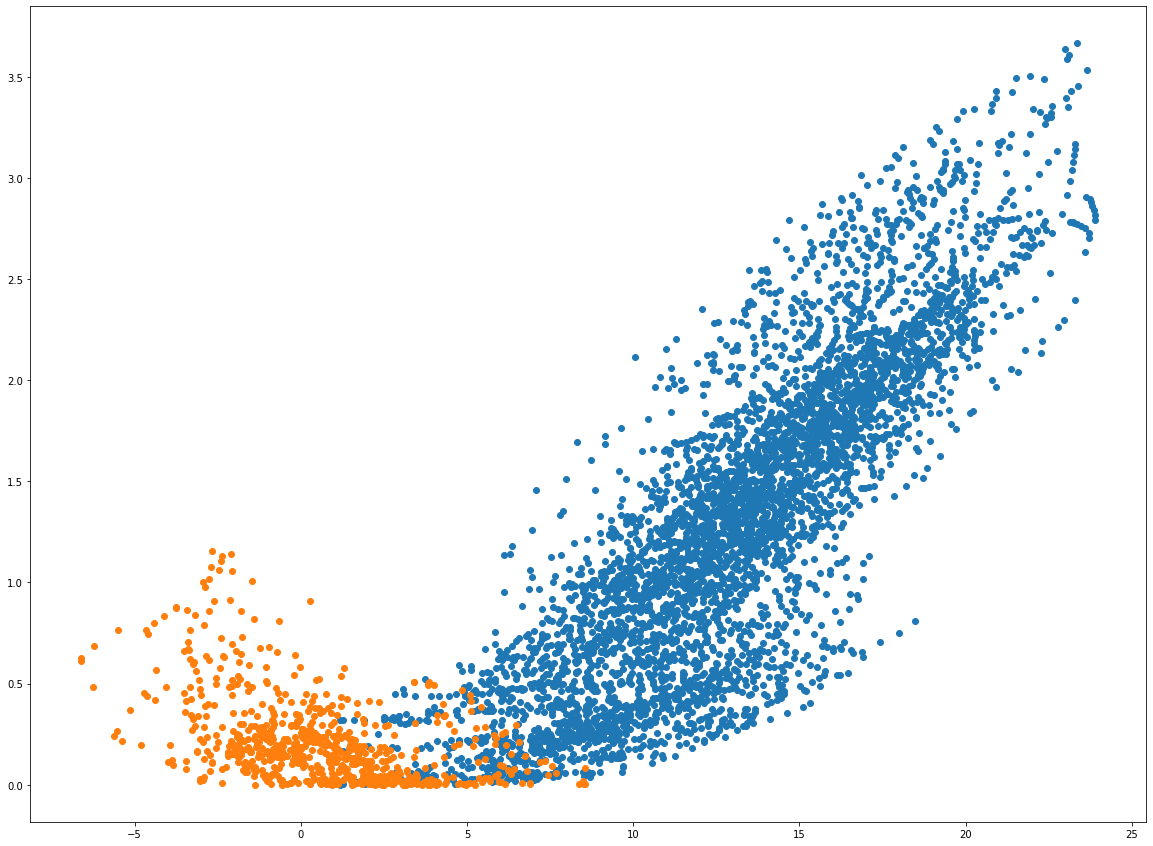

In [19]:
plt.scatter(dfHeating.deltaT,dfHeating.Heating)
plt.scatter(dfCooling.deltaT,dfCooling.Cooling)

In [20]:
#model = sm.OLS(df.Power,sm.add_constant(df.deltaT))

In [21]:
modelHheat = sm.OLS(dfHeating.Heating,sm.add_constant(dfHeating.deltaT))
resultsHheat = modelHheat.fit()
modelHcool = sm.OLS(dfCooling.Cooling,sm.add_constant(dfCooling.deltaT))
resultsHcool = modelHcool.fit()

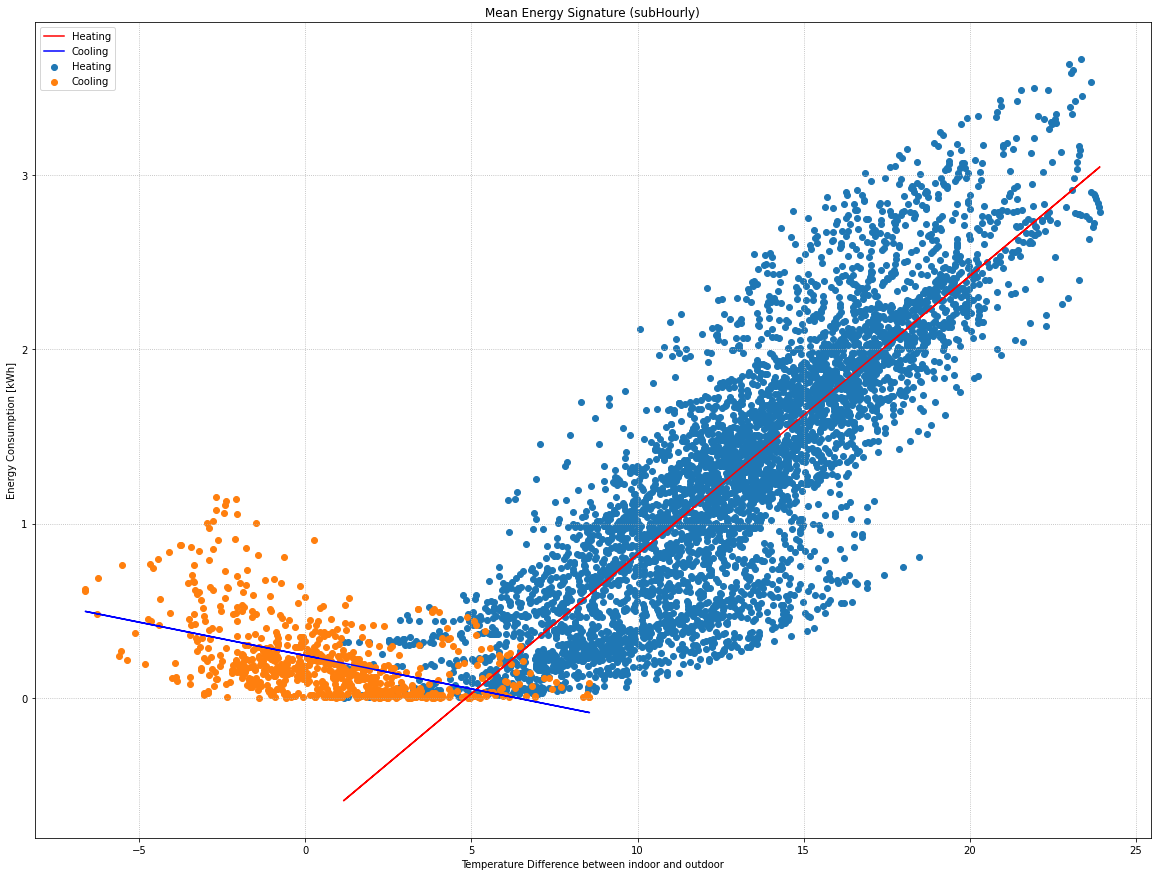

In [22]:
plt.plot(dfHeating.deltaT,resultsHheat.predict(),c='r',label='Heating')
plt.plot(dfCooling.deltaT,resultsHcool.predict(),c='b',label='Cooling')
plt.scatter(dfHeating.deltaT,dfHeating.Heating,label='Heating')
plt.scatter(dfCooling.deltaT,dfCooling.Cooling,label='Cooling')
plt.title('Mean Energy Signature (subHourly)')
plt.xlabel('Temperature Difference between indoor and outdoor')
plt.ylabel('Energy Consumption [kWh]')
plt.grid(linestyle=':')
plt.legend()
plt.savefig('/home/ni/Downloads/hourly.png')

In [23]:
resultsHheat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Heating   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.226e+04
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:16:22   Log-Likelihood:                -2501.0
No. Observations:                4744   AIC:                             5006.
Df Residuals:                    4742   BIC:                             5019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7755      0.020    -39.300      0.000      -0.814      -0.737
deltaT         0.1599      0.001    110.745      0.000       0.157       0.163
==============================================================================
Omnibus:                       33.810   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.973
Skew:                          -0.116   Prob(JB):                     4.66e-10
Kurtosis:                       3.405   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
resultsHcool.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Cooling   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           1.34e-40
Time:                        00:16:22   Log-Likelihood:                 156.64
No. Observations:                 707   AIC:                            -309.3
Df Residuals:                     705   BIC:                            -300.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2430      0.007     32.538      0.000       0.228       0.258
deltaT        -0.0383      0.003    -14.235      0.000      -0.044      -0.033
==============================================================================
Omnibus:                      185.520   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.670
Skew:                           1.408   Prob(JB):                     3.32e-91
Kurtosis:                       5.493   Cond. No.                         2.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
dfD=df.resample('D').mean()
dfD=dfD.dropna()
dfHeatingD=dfHeating.resample('D').mean()
dfHeatingD=dfHeatingD.dropna()
dfCoolingD=dfCooling.resample('D').mean()
dfCoolingD=dfCoolingD.dropna()

In [26]:
modelDheat = sm.OLS(dfHeatingD.Heating,sm.add_constant(dfHeatingD.deltaT))
resultsDheat = modelDheat.fit()
modelDcool = sm.OLS(dfCoolingD.Cooling,sm.add_constant(dfCoolingD.deltaT))
resultsDcool = modelDcool.fit()

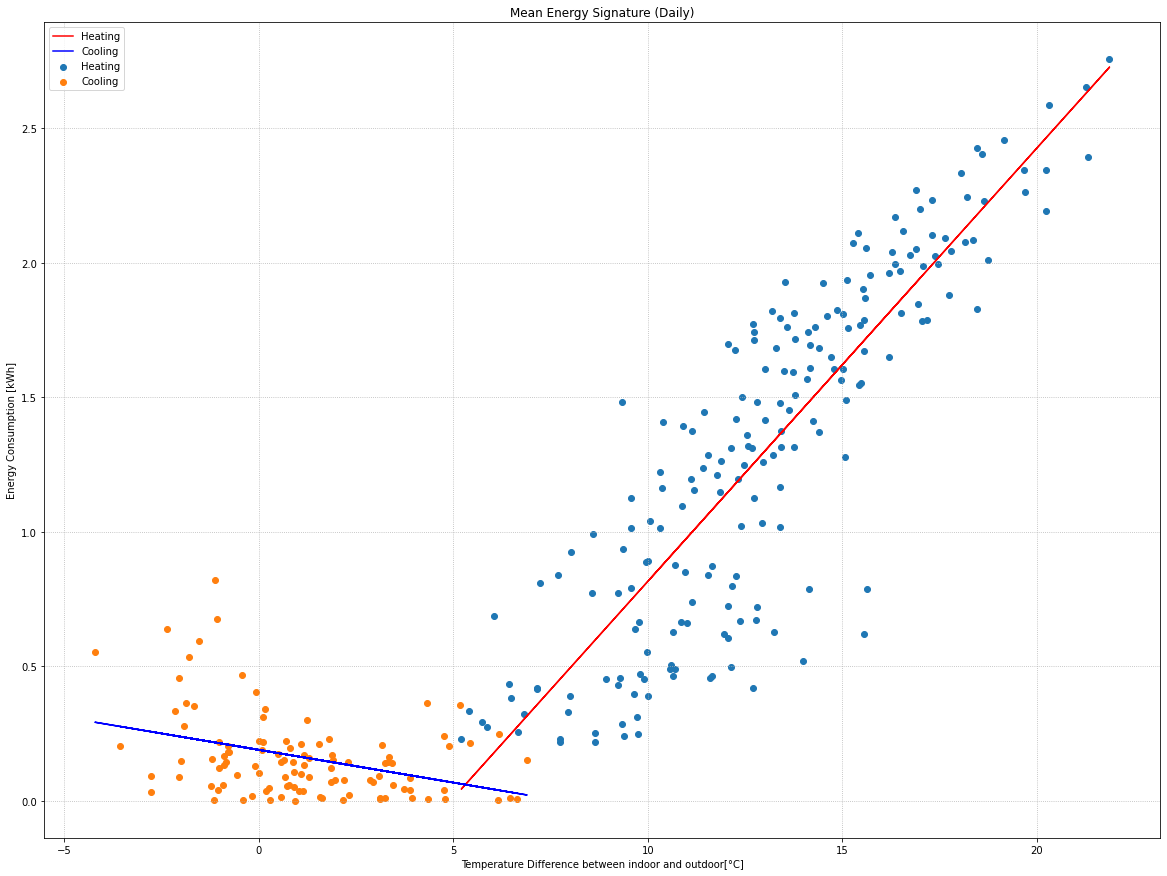

In [27]:
plt.plot(dfHeatingD.deltaT,resultsDheat.predict(),c='r',label='Heating')
plt.plot(dfCoolingD.deltaT,resultsDcool.predict(),c='b',label='Cooling')
plt.scatter(dfHeatingD.deltaT,dfHeatingD.Heating,label='Heating')
plt.scatter(dfCoolingD.deltaT,dfCoolingD.Cooling,label='Cooling')
plt.title('Mean Energy Signature (Daily)')
plt.xlabel('Temperature Difference between indoor and outdoor[\u00B0C]')
plt.ylabel('Energy Consumption [kWh]')
plt.grid(linestyle=':')
plt.legend()
plt.savefig('/home/ni/Downloads/Daily.png')

In [28]:
resultsDheat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Heating   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     615.2
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           1.65e-62
Time:                        00:16:25   Log-Likelihood:                -54.988
No. Observations:                 199   AIC:                             114.0
Df Residuals:                     197   BIC:                             120.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7947      0.088     -9.072      0.000      -0.967      -0.622
deltaT         0.1610      0.006     24.803      0.000       0.148       0.174
==============================================================================
Omnibus:                       14.130   Durbin-Watson:                   0.444
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.997
Skew:                          -0.639   Prob(JB):                     0.000554
Kurtosis:                       3.419   Cond. No.                         52.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
resultsDcool.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Cooling   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     16.29
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           0.000103
Time:                        00:16:25   Log-Likelihood:                 53.492
No. Observations:                 108   AIC:                            -103.0
Df Residuals:                     106   BIC:                            -97.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1898      0.016     11.972      0.000       0.158       0.221
deltaT        -0.0243      0.006     -4.036      0.000      -0.036      -0.012
==============================================================================
Omnibus:                       35.322   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.957
Skew:                           1.412   Prob(JB):                     2.13e-14
Kurtosis:                       5.452   Cond. No.                         3.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
dfW=df.resample('W').mean()
dfW=dfW.dropna()
dfHeatingW=dfHeating.resample('W').mean()
dfHeatingW=dfHeatingW.dropna()
dfCoolingW=dfCooling.resample('W').mean()
dfCoolingW=dfCoolingW.dropna()

In [31]:
modelWheat = sm.OLS(dfHeatingW.Heating,sm.add_constant(dfHeatingW.deltaT))
resultsWheat = modelWheat.fit()
modelWcool = sm.OLS(dfCoolingW.Cooling,sm.add_constant(dfCoolingW.deltaT))
resultsWcool = modelWcool.fit()

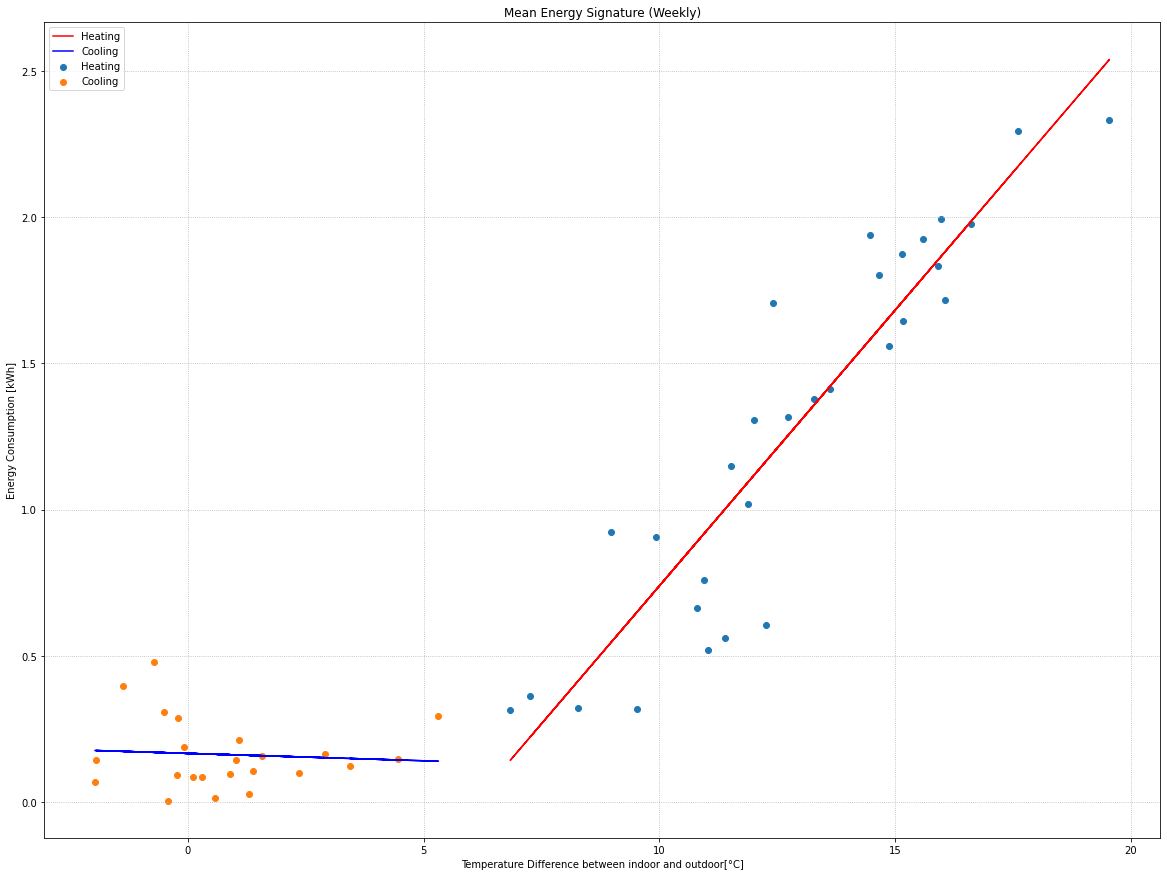

In [32]:
plt.plot(dfHeatingW.deltaT,resultsWheat.predict(),c='r',label='Heating')
plt.plot(dfCoolingW.deltaT,resultsWcool.predict(),c='b',label='Cooling')
plt.scatter(dfHeatingW.deltaT,dfHeatingW.Heating,label='Heating')
plt.scatter(dfCoolingW.deltaT,dfCoolingW.Cooling,label='Cooling')
plt.title('Mean Energy Signature (Weekly)')
plt.xlabel('Temperature Difference between indoor and outdoor[\u00B0C]')
plt.ylabel('Energy Consumption [kWh]')
plt.grid(linestyle=':')
plt.legend()
plt.savefig('/home/ni/Downloads/weekly.png')

In [33]:
resultsWheat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Heating   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           4.31e-13
Time:                        00:16:27   Log-Likelihood:                0.10287
No. Observations:                  30   AIC:                             3.794
Df Residuals:                      28   BIC:                             6.597
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1463      0.197     -5.808      0.000      -1.551      -0.742
deltaT         0.1885      0.015     12.642      0.000       0.158       0.219
==============================================================================
Omnibus:                        0.725   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.428
Skew:                          -0.290   Prob(JB):                        0.807
Kurtosis:                       2.920   Cond. No.                         57.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
resultsWcool.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Cooling   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.1321
Date:                Sat, 12 Feb 2022   Prob (F-statistic):              0.720
Time:                        00:16:27   Log-Likelihood:                 16.710
No. Observations:                  23   AIC:                            -29.42
Df Residuals:                      21   BIC:                            -27.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1663      0.028      5.928      0.000       0.108       0.225
deltaT        -0.0050      0.014     -0.363      0.720      -0.034       0.024
==============================================================================
Omnibus:                        5.510   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                3.810
Skew:                           0.977   Prob(JB):                        0.149
Kurtosis:                       3.395   Cond. No.                         2.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""